In [33]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [34]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Using GaussinBlur filter
def makeSharper(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def imageTransformation(img_in):
    img_in = img_in.copy()
    img_out= makeSharper(img_in)
    img_out = cv2.cvtColor(img_in, cv2.COLOR_RGB2YUV)
    img_out[:,:,0] = cv2.equalizeHist(img_out[:,:,0])
    return img_out[:,:,0]

# Rotating image randomly
def rotateImageRandomly(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

# Scaling image randomly
def scaleImageRandomly(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    dy = int((img2.shape[1]-img.shape[0])/2)
    end = img.shape[1]-dy
    img2 = img2[dy:end,:,:]
    assert img2.shape[0] == 32
    return img2

def linearImageTransformation(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

# Changin image contrast
def changeImageContrast(img, s=1.0):
    m=127.0*(1.0-s)
    return linearImageTransformation(img, s, m)

# Change Image Contrast
# Rotate Image Randomly
# Scale Image Randomly
# Image Transformation
def makeAugmentation(img):
    img = img.copy()
    img = changeImageContrast(img, 1.8*np.random.rand()+0.2)
    img = rotateImageRandomly(img)
    img = scaleImageRandomly(img)
    img = imageTransformation(img)
    return img 

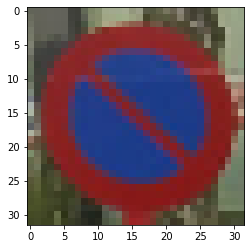

In [36]:
img = cv2.imread("/content/drive/MyDrive/phan_loai_bbgt/mydata/0/0_1.png")
originImg = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

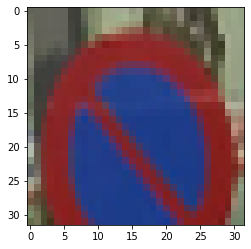

In [37]:
augImg = scaleImageRandomly(img)
# cv2.imwrite("/content/drive/MyDrive/phan_loai_bbgt/augImg.png",augImg)
plt.imshow(augImg)
plt.show()

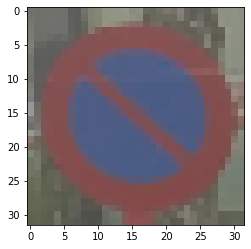

In [38]:
augImg1 = changeImageContrast(img,1.8*np.random.rand()+0.2)
# cv2.imwrite("/content/drive/MyDrive/phan_loai_bbgt/augImg1.png",augImg1)
plt.imshow(augImg1)
plt.show()

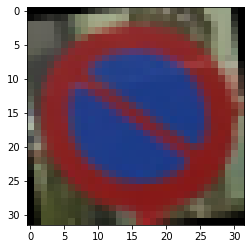

In [39]:
augImg2 = rotateImageRandomly(img)
# cv2.imwrite("/content/drive/MyDrive/phan_loai_bbgt/augImg2.png",augImg2)
plt.imshow(augImg2)
plt.show()

In [40]:
##################### load & resize dataset
# path = "/content/drive/MyDrive/phan_loai_bbgt"
# savePath = "/content/drive/MyDrive/phan_loai_bbgt/mydata"
# classNo = 9
# classID = [0,1,2,3,4,5,6,7,8]
# print("load Image...")
# for i in classID:
#   print(i,end=" ")
#   classPath = path + "/" + str(i)
#   # print(classPath)
#   imgList = os.listdir(classPath)
#   # print(soluongImg)
#   for imgP in imgList:
#     curImg = cv2.imread(classPath + "/" + imgP)
#     curImg = cv2.resize(curImg,(32,32))
#     saveImgP = f"/content/drive/MyDrive/phan_loai_bbgt/mydata/{i}/{imgP}"
#     # print(saveImgP)
#     cv2.imwrite(saveImgP,curImg)

In [41]:
############## thay doi do tp
# print("tăng cường ảnh(thay đổi độ tương phản)...")
# for i in range(classNo):
#   print(i,end=" ")
#   classPath = path + "/" + str(i)
#   # print(classPath)
#   imgList = os.listdir(classPath)
#   # print(soluongImg)
#   for imgP in imgList:
#     curImg = cv2.imread(classPath + "/" + imgP)
#     curImg = cv2.resize(curImg,(32,32))
#     # curImg = cv2.cvtColor(curImg,cv2.COLOR_BGR2RGB)
#     curImg = changeImageContrast(curImg, 1.8*np.random.rand()+0.2)
#     saveImgP = f"/content/drive/MyDrive/phan_loai_bbgt/mydata/{i}/a1_{imgP}"
#     # print(saveImgP)
#     cv2.imwrite(saveImgP,curImg)

In [42]:
###############
# print("tăng cường ảnh(xoay ảnh)...")
# for i in range(classNo):
#   print(i,end=" ")
#   classPath = path + "/" + str(i)
#   # print(classPath)
#   imgList = os.listdir(classPath)
#   # print(soluongImg)
#   for imgP in imgList:
#     curImg = cv2.imread(classPath + "/" + imgP)
#     curImg = cv2.resize(curImg,(32,32))
#     curImg = rotateImageRandomly(curImg)
#     saveImgP = f"/content/drive/MyDrive/phan_loai_bbgt/mydata/{i}/a2_{imgP}"
#     # print(saveImgP)
#     cv2.imwrite(saveImgP,curImg)

In [43]:
###############
# print("tăng cường ảnh(thu phóng)...")
# for i in range(classNo):
#   print(i,end=" ")
#   classPath = path + "/" + str(i)
#   # print(classPath)
#   imgList = os.listdir(classPath)
#   # print(soluongImg)
#   for imgP in imgList:
#     curImg = cv2.imread(classPath + "/" + imgP)
#     curImg = cv2.resize(curImg,(32,32))
#     curImg = scaleImageRandomly(curImg)
#     saveImgP = f"/content/drive/MyDrive/phan_loai_bbgt/mydata/{i}/a3_{imgP}"
#     # print(saveImgP)
#     cv2.imwrite(saveImgP,curImg)